In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
# v0 - disable 25% chance of ignoring action and repeating last action
# note that the environment uses a stochastic frame skip. i.e. randomly
# skips {1, 2, 3} frames between active frames
# env = gym.make('Breakout-v0')

# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('PongDeterministic-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
from keras.optimizers import Adam

In [7]:
agent = DeepQAgent(env, 
    agent_history_length=4, 
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-5)
)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<PongDeterministic-v4>>>,
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x7fa6cbb65898>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    loss=<function huber_loss at 0x7fa6d9261730>,
    image_size=(84, 84),
)

In [8]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [01:01<00:00,  2.06s/game]


array([-21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -21., -21., -21., -21., -21., -21.])

In [9]:
res_random.mean()

-21.0

In [10]:
agent.observe(50000)

100%|██████████| 50000/50000 [01:07<00:00, 744.99frame/s]


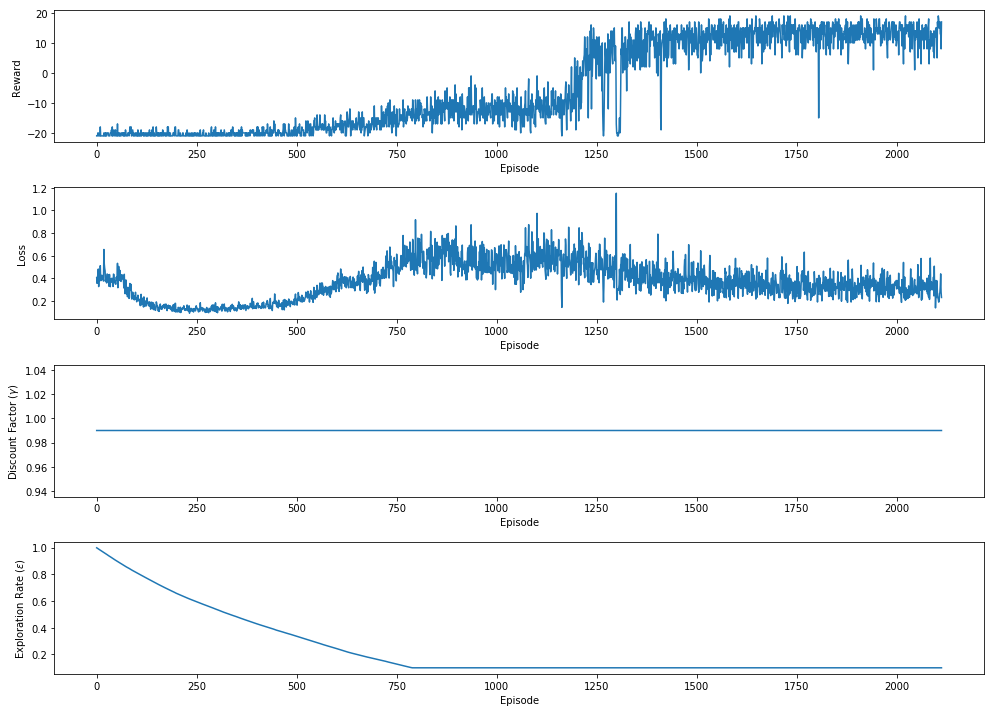

100%|█████████▉| 4998206/5000000 [13:24:00<00:18, 95.66frame/s]


In [11]:
agent.train(frames_to_play=5000000, callback=JupyterCallback())

In [12]:
res_trained = agent.play(games=30)
res_trained

100%|██████████| 30/30 [02:42<00:00,  5.42s/game]


array([17., 16., 17., 17., 16., 15., 17., 14., 17., 19., 17., 19., 18.,
       17., 19., 15., 19., 17., 17., 19., 15., 16., 16., 17., 15., 16.,
       17., 17., 18., 18.])

In [13]:
res_trained.mean()

16.9

In [15]:
!mkdir -p models
!mkdir -p models/dqn

In [16]:
agent.save_model('./models/dqn/pong.h5')